# Stochastic-Gradient-descent For linear regression

# What is Stochastic-Gradient-descent ?

Stochastic gradient descent (often shortened to SGD), also known as incremental gradient descent, is an iterative method for optimizing a differentiable objective function, a stochastic approximation of gradient descent optimization

http://deeplearning.stanford.edu/tutorial/supervised/OptimizationStochasticGradientDescent/

The standard gradient descent algorithm updates the parameters θ of the objective J(θ) as,

θ=θ−α∇θE[J(θ)]
where the expectation in the above equation is approximated by evaluating the cost and gradient over the full training set. Stochastic Gradient Descent (SGD) simply does away with the expectation in the update and computes the gradient of the parameters using only a single or a few training examples. The new update is given by,

θ=θ−α∇θJ(θ;x(i),y(i))
with a pair (x(i),y(i)) from the training set.

Generally each parameter update in SGD is computed w.r.t a few training examples or a minibatch as opposed to a single example. The reason for this is twofold: first this reduces the variance in the parameter update and can lead to more stable convergence, second this allows the computation to take advantage of highly optimized matrix operations that should be used in a well vectorized computation of the cost and gradient. A typical minibatch size is 256, although the optimal size of the minibatch can vary for different applications and architectures.

In SGD the learning rate α is typically much smaller than a corresponding learning rate in batch gradient descent because there is much more variance in the update. Choosing the proper learning rate and schedule (i.e. changing the value of the learning rate as learning progresses) can be fairly difficult. One standard method that works well in practice is to use a small enough constant learning rate that gives stable convergence in the initial epoch (full pass through the training set) or two of training and then halve the value of the learning rate as convergence slows down. An even better approach is to evaluate a held out set after each epoch and anneal the learning rate when the change in objective between epochs is below a small threshold. This tends to give good convergence to a local optima. Another commonly used schedule is to anneal the learning rate at each iteration t as ab+t where a and b dictate the initial learning rate and when the annealing begins respectively. More sophisticated methods include using a backtracking line search to find the optimal update.

One final but important point regarding SGD is the order in which we present the data to the algorithm. If the data is given in some meaningful order, this can bias the gradient and lead to poor convergence. Generally a good method to avoid this is to randomly shuffle the data prior to each epoch of training.

# Objective :-

1. In this assignment we are going to implement the linear regression using SGD alogorithm .

2. Then we are going to test the aologrithm in boston dataset and compaire with the Sklearn implemation of linear regression method

In [1]:
import os
os.getcwd()

'C:\\Users\\Nicky\\Desktop\\my work\\linear regression'

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
boston = load_boston()

In [3]:
# Convert it into pandas dataframe
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
data["PRICE"] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Target and features
Y = data["PRICE"]
X = data.drop("PRICE", axis = 1)

# Split data into train and test

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33,random_state=42)
print("X_train :- ",X_train.shape)
print("X_test :- ",X_test.shape)
print("Y_train :- ",Y_train.shape)
print("Y_test :- ",Y_test.shape)

X_train :-  (339, 13)
X_test :-  (167, 13)
Y_train :-  (339,)
Y_test :-  (167,)


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Manual stochastic Gradient Decent(SGD) for Linear Regression

The code is found from the below site . Code has been changed slightly for our requirement .


https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0

In [8]:
def stochastic_grad_descent(x_train, y_train, n_iter = 500, learning_rate=0.01):
    c = 0 #bias 
    m = np.random.normal(loc = 0, scale = 1, size=(x_train.shape[1],)) #Initial weight
    y_train = np.asarray(y_train)
    n = x_train.shape[0]
    loss = []   
    for i in range(n_iter):
        count =0
        for i in np.arange(0, x_train.shape[0], 40):
            X_groups=x_train[i:i + 40]
            #print(X_groups)
            y_groups=y_train[i:i + 40]
            yhat = X_groups.dot(m) + c
            #print('yhat',yhat)
            error = y_groups-yhat
            #print('error',error)
            sq_loss = (1/n) * np.sum(error ** 2)
            m_grad = -(2/n) * X_groups.T.dot(error)
            c_grad = -(2/n) * np.sum(error)
            #Update statement
            m = m - (learning_rate * m_grad)
            c = c - (learning_rate * c_grad)
            count+= 1
            
        loss.append(np.average(sq_loss))

    
    return m, c, loss

In [9]:
optimal_W,optimal_b, loss = stochastic_grad_descent(X_train, Y_train)

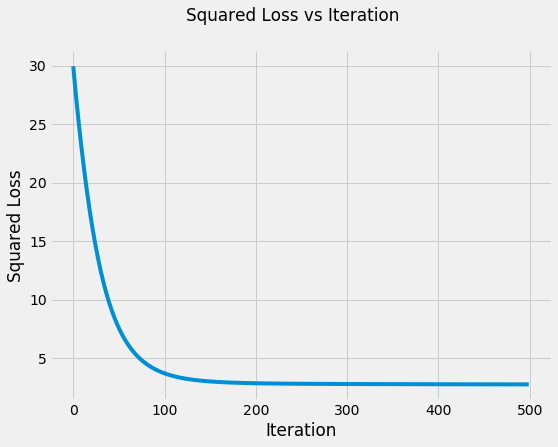

In [10]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(0,500), loss)
fig.suptitle("Squared Loss vs Iteration")
plt.xlabel("Iteration")
plt.ylabel("Squared Loss")
plt.show()

Here we can able to see that after 115 iteration with learing rate 0.01 , slope m is not converging that much . It nearly constant

In [11]:
def predict(x_test,y_test,m,c):
    print("\n\033[1mOptimal m: \033[0m",m)
    print("\n\033[1mOptimal c(bias): \033[0m",np.round(c,3))
    y_test = np.asarray(y_test)
    n = x_test.shape[0]
    y_pred = x_test.dot(m) + c
    error = y_test-y_pred
    sq_loss = (1/n) * np.sum(error**2)
    rmse = np.sqrt(sq_loss)
    
    print("\n\033[1mMSE: \033[0m",np.round(sq_loss,3))
    print("\n\033[1mRMSE: \033[0m",np.round(rmse,3))
    
    return y_pred,error
    
if __name__ == "__main__":
    Y_pred,error = predict(X_test,Y_test,optimal_W,optimal_b)


Optimal m:  [-0.82078506  0.55218059  0.01562014  0.94546898 -1.51146833  3.04061987
 -0.54102645 -2.74620511  0.74541718 -0.12300141 -1.97248919  1.06428334
 -3.77321936]

Optimal c(bias):  22.969

MSE:  21.833

RMSE:  4.673


# Sklearn Linear Regression model :-

In [12]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred_sklearn = lm.predict(X_test)

In [13]:
print("Coefficients: \n", lm.coef_)
print("Y_intercept", lm.intercept_)

Coefficients: 
 [-0.98213794  0.86729819  0.40781039  0.86221098 -1.90626375  2.80199743
 -0.35691613 -3.04777133  2.02981068 -1.36223075 -2.08528939  1.05413356
 -3.9329093 ]
Y_intercept 22.970796460176988


In [14]:
error_sklearn = Y_test - Y_pred_sklearn

In [15]:
MSE = (1/X_test.shape[0]) * np.sum(error_sklearn**2)
print('MSE: ',MSE)
RMSE = np.sqrt(MSE)
print('RMSE: ',RMSE)

MSE:  20.747143360308833
RMSE:  4.554903221837851


# Comparison Between Sklearn linear regression and Manual SGD linear regression model

# Price comaprison of  both the model :-

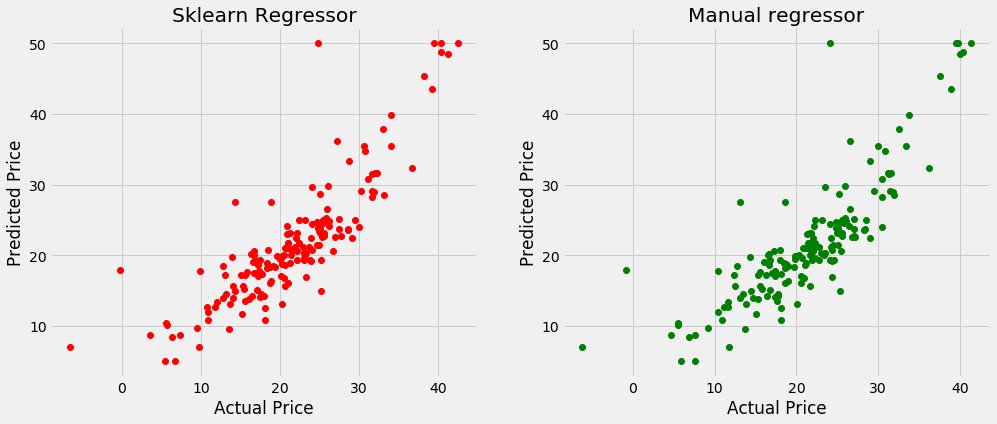

In [16]:
plt.figure(figsize = (15,6))
plt.style.use('fivethirtyeight')

plt.subplot(121)
plt.plot(Y_pred_sklearn,Y_test,'ro')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Sklearn Regressor")

#plt.figure(figsize = (10,6))
plt.subplot(122)
plt.plot(Y_pred,Y_test,'go')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Manual regressor")
plt.show()

# Error distiribution of both the model

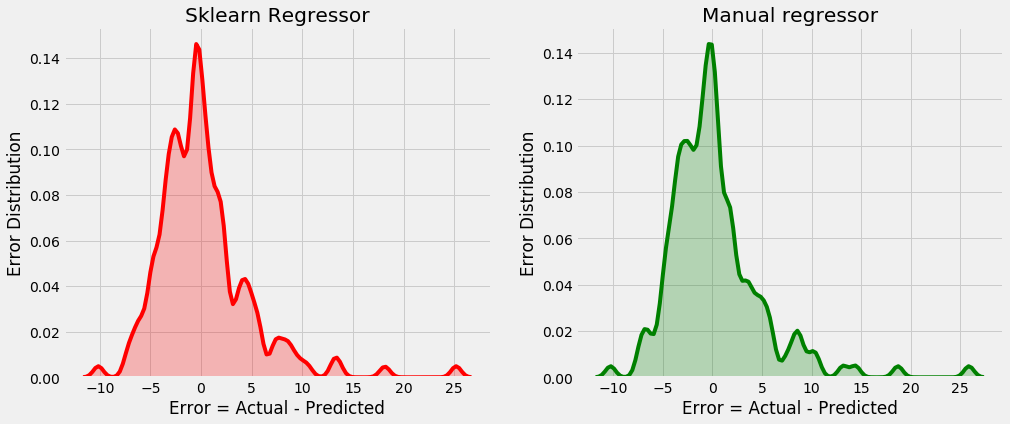

In [17]:
import seaborn as sns
plt.figure(figsize = (15,6))
plt.style.use('fivethirtyeight')

plt.subplot(121)
sns.kdeplot(np.array(error_sklearn), bw = 0.5, color = "r", shade = True)
plt.xlabel("Error = Actual - Predicted")
plt.ylabel("Error Distribution")
plt.title("Sklearn Regressor")

plt.subplot(122)
sns.kdeplot(np.array(error), bw = 0.5, color = "g", shade = True)
plt.xlabel("Error = Actual - Predicted")
plt.ylabel("Error Distribution")
plt.title("Manual regressor")
plt.show()

# Weight Comparison betweeen sk-learn SGD and manual-SGD

In [19]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Weight", "Manual SGD","SK-learn"]

x.add_row(["w1","-0.82078506", "-0.98213794"])
x.add_row(["w2","0.55218059 ", "0.86729819"])
x.add_row(["w3","0.01562014", "0.40781039"])
x.add_row(["w4","0.94546898", "0.86221098"])
x.add_row(["w5","-1.51146833", "-1.90626375"])
x.add_row(["w6","3.04061987", " 2.80199743"])
x.add_row(["w7","-0.54102645", "-0.35691613"])
x.add_row(["w8","-2.74620511", "-3.04777133"])
x.add_row(["w9","0.74541718", "2.02981068"])
x.add_row(["w10","-0.12300141", "-1.36223075"])
x.add_row(["w11","-1.97248919", "-2.08528939"])
x.add_row(["w12","1.06428334", "1.05413356"])
x.add_row(["w13","-3.77321936", "-3.9329093"])

print(x)

+--------+-------------+-------------+
| Weight |  Manual SGD |   SK-learn  |
+--------+-------------+-------------+
|   w1   | -0.82078506 | -0.98213794 |
|   w2   | 0.55218059  |  0.86729819 |
|   w3   |  0.01562014 |  0.40781039 |
|   w4   |  0.94546898 |  0.86221098 |
|   w5   | -1.51146833 | -1.90626375 |
|   w6   |  3.04061987 |  2.80199743 |
|   w7   | -0.54102645 | -0.35691613 |
|   w8   | -2.74620511 | -3.04777133 |
|   w9   |  0.74541718 |  2.02981068 |
|  w10   | -0.12300141 | -1.36223075 |
|  w11   | -1.97248919 | -2.08528939 |
|  w12   |  1.06428334 |  1.05413356 |
|  w13   | -3.77321936 |  -3.9329093 |
+--------+-------------+-------------+


# Conclusions

1). Here we can able to find that in manual SGD the number of iteration increarese the squared loss also decrease very quickly ,
    but after some iteration it was decreased .

2). In the above plots we can able to see the by the manual SGD we are getting nearly same predicition value as sklearn implemention

3). In Sklearn implemetion we are getting mse as 20.74 where as though manual method we are getting 21.65 